In [3]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [10]:
def plot_img(img, f_size=(10,10)):
    plt.figure(figsize=f_size)
    plt.imshow(img)
    
PATH = './images/task_4/'

### Original image

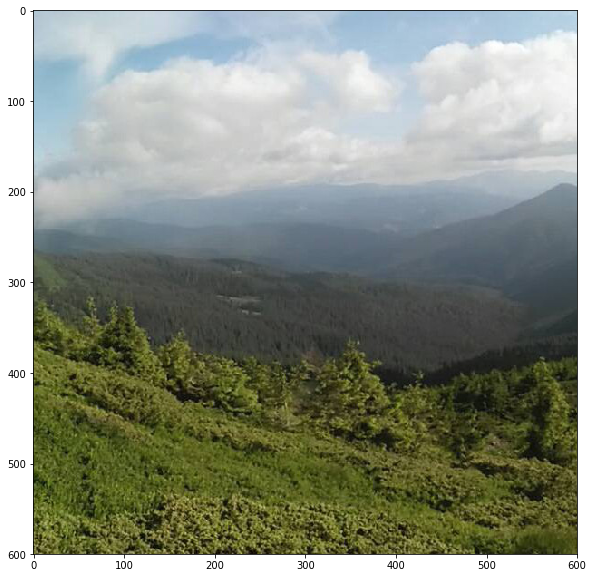

In [11]:
img = mpimg.imread(PATH + 'image_1.jpg')

plot_img(img)

### Find matrix of Affine transform by 2 lists of 3 points

In [18]:
def getAffTransforn(pts1, pts2):
  A = np.array([
      [pts1[0][0], pts1[0][1], 0, 0, 1, 0],
      [0, 0, pts1[0][0], pts1[0][1], 0, 1],
      
      [pts1[1][0], pts1[1][1], 0, 0, 1, 0],
      [0, 0, pts1[1][0], pts1[1][1], 0, 1],
      
      [pts1[2][0], pts1[2][1], 0, 0, 1, 0],
      [0, 0, pts1[2][0], pts1[2][1], 0, 1],
  ])

  y = np.array([
      pts2[0][0],pts2[0][1],pts2[1][0],pts2[1][1],pts2[2][0],pts2[2][1]
  ])
  
  x = np.dot(np.linalg.inv(A), y)
  M = np.array([
      [x[0], x[1], x[4]],
      [x[2], x[3], x[5]],
  ])
  return M

### Initialize lists of points

In [19]:
(r,c) = img.shape[:2]
pts1 = np.float32([[0,0],[r,0],[0,c]])
pts2 = np.float32([[50,0],[r,50],[0,c-50]])

### Apply matrix of Affine transformation

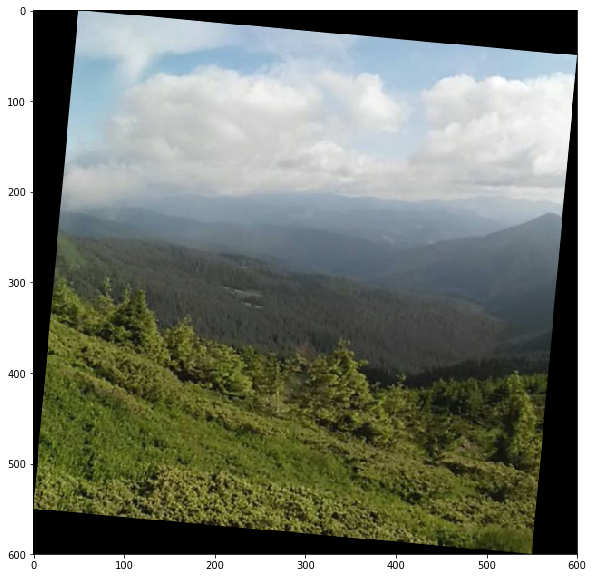

In [22]:
M = getAffTransforn(pts1, pts2)

dst = cv2.warpAffine(img,M,img.shape[:2])

plot_img(dst)